In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ODE solver
from scipy.integrate import solve_ivp
from scipy.optimize import minimize

# See below
import importlib

# This contains all the functions needed for simulation
import functions

# This helps reload the 'functions' module. By default, this is not done.
importlib.reload(functions)

<module 'functions' from 'C:\\Users\\bai_f\\Documents\\research\\TakedaInternship\\simulation\\functions.py'>

## Prepare data

In [15]:
# Aducanumab PK from Lin2022 Fig2a
# 60, 30, ..., 0.3 mg/kg, single dosing
# time unit: week
excel_file_path = "Antibody data.xlsx"
df = pd.read_excel(excel_file_path, sheet_name='Lin2022Fig2a')
df

,time60,concentration60,time30,concentration30,time20,concentration20,time10,concentration10,time3,concentration3,time1,concentration1,time0.3,concentration0.3
0,0.000000,1621.35000,0.039308,438.50600,0.393082,132.879000,0.196541,79.658900,0.235849,30.302700,0.196541,10.890200,0.157233,3.593810
1,0.078616,1058.50000,0.275157,255.51000,1.022010,77.426400,0.393082,59.948400,0.393082,22.165600,0.471698,7.314720,0.314465,2.413880
2,0.314465,710.97100,0.628931,176.56900,1.926100,50.548000,0.786164,46.415900,0.982704,11.527300,0.786164,5.200550,0.707547,1.406530
3,0.393082,535.05100,0.982704,125.53500,2.948110,38.040600,1.061320,39.137500,1.886790,9.182540,1.179250,3.395190,1.493710,0.971973
4,0.786164,369.74400,2.161950,75.25640,5.974840,12.553500,1.847480,24.834900,3.341190,6.345550,1.808180,3.030270,1.965410,0.752564
5,0.943396,294.53400,2.908810,59.94840,10.967000,4.262160,3.105350,22.165600,2.240570,5.663520,2.004720,2.555100,2.987420,0.550479
6,1.965410,181.66000,5.974840,32.07550,10.967000,2.945340,2.044030,19.783200,2.790880,5.504790,2.987420,2.280470,5.817610,0.349309
7,3.026730,140.65300,11.084900,12.55350,13.718600,1.255350,2.790880,19.228700,6.053460,2.094050,2.987420,1.531740,NaN,NaN
8,3.380500,100.00000,24.017300,1.08902,24.056600,1.185970,5.935530,10.000000,5.974840,1.575910,5.935530,1.255350,NaN,NaN
9,6.092770,77.42640,NaN,NaN,24.135200,0.248349,5.856920,7.314720,11.006300,1.089020,5.856920,0.634555,NaN,NaN


In [16]:
# Drop NaN in the data and convert time unit from week to hour
week_to_hour = functions.parameters['week_to_hour']

time60 = df['time60'].dropna().values * week_to_hour
concentration60 = df['concentration60'].dropna().values

time30 = df['time30'].dropna().values * week_to_hour
concentration30 = df['concentration30'].dropna().values

time20 = df['time20'].dropna().values * week_to_hour
concentration20 = df['concentration20'].dropna().values

time10 = df['time10'].dropna().values * week_to_hour
concentration10 = df['concentration10'].dropna().values

time3 = df['time3'].dropna().values * week_to_hour
concentration3 = df['concentration3'].dropna().values

time1 = df['time1'].dropna().values * week_to_hour
concentration1 = df['concentration1'].dropna().values

time0p3 = df['time0.3'].dropna().values * week_to_hour
concentration0p3 = df['concentration0.3'].dropna().values



data = [time60, concentration60, time30, concentration30, 
        time20, concentration20, time10, concentration10, 
        time3, concentration3, time1, concentration1, 
        time0p3, concentration0p3]


## Fitting

In [17]:
functions.AduPKFitting_turnoff_binding()

In [18]:
t0 = functions.parameters['t0']

pars_init = []
pars_init.append(1e-6 * t0)
pars_init.append(1e-6 * t0)
pars_init.append(1e-6 * t0)


bounds = []
bounds.append((1e-8 * t0, 1e-3 * t0))
bounds.append((1e-8 * t0, 1e-3 * t0))
bounds.append((1e-8 * t0, 1e-3 * t0))

result = minimize(functions.AduPKFitting_func_obj, x0=pars_init, 
                  args=(data,), 
                  bounds=bounds)
print("Fitted", result.x)

Fitted [0.33420272 0.01731796 0.04748872]


In [19]:
result.x / t0

array([9.28340900e-05, 4.81054556e-06, 1.31913099e-05])

In [ ]:
# 9.28340900e-05, 4.81054556e-06, 1.31913099e-05

In [20]:
# 8.78913436e-05, 4.60188504e-06, 1.31072082e-05

In [21]:
# Previous fitted result
# k_PL_PE_mAb_tran = 1.81946225e-04 * t0 # Fitted
# k_PE_PL_mAb_tran = 8.56369151e-06 * t0 # Fitted
# k_PL_mAb_clear = 1.38099820e-05 * t0 # Fitted

## Compare the fitted model with data

In [22]:
# Assign the fitted parameter values
functions.parameters['k_PL_PE_mAb_tran'] = result.x[0]
functions.parameters['k_PE_PL_mAb_tran'] = result.x[1]
functions.parameters['k_PL_mAb_clear'] = result.x[2]

# Basal PK at different single dosing
# Dose: the unit is g/kg (original unit: mg/kg)
dose_list_mgkg = np.array([0.3, 1, 3, 10, 20, 30, 60])
dose_list = dose_list_mgkg * 1e-3

# Time constants (in hours)
t_start = 0
t_end_week = 30
t_end = t_end_week * functions.parameters['week_to_hour'] 

t_span = [t_start, t_end]
t_eval = np.linspace(t_start, t_end, 100+1)

# Prepare lists to store results
PL_mAb_hist_list = []
t_hist_list = []

for dose in dose_list:
    # Initial plasma antibody concentration
    PL_mAb_init = dose * functions.parameters['W_normal']  \
                            / functions.parameters['MW_aducanumab']  \
                            / functions.parameters['V_PL'] \
                            / functions.parameters['m0']
    
    y0 = functions.set_zero_initial_conditions_except_PL_mAb(PL_mAb_init)

    # Solve ODEs
    sol = solve_ivp(functions.RHS, t_span, y0, 
                    method='LSODA', t_eval = t_eval, rtol=1e-3, max_step=1e2)

    # Get time histories of all species
    t_hist = sol.t    
    t_hist_list.append(t_hist)
    PL_mAb_hist_list.append(sol.y[functions.indices_species['PL_mAb']])

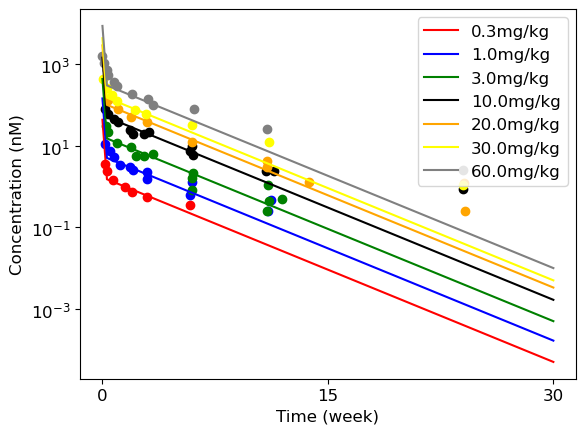

In [23]:
# Visualization
# Single doses
fig = plt.figure()
ax = fig.add_subplot(111)
fontsize = 12

color_list = ['red', 'blue', 'green', 'black', 'orange', 'yellow', 'grey']
time_data_list = [time0p3, time1, time3, time10, time20, time30, time60]
concentration_data_list = [concentration0p3, concentration1, concentration3, concentration10,
                           concentration20, concentration30, concentration60]



for color, dose, t_hist, PL_mAb_hist, t_data, concentration_data in zip(color_list, dose_list_mgkg, 
                                                                 t_hist_list, PL_mAb_hist_list,
                                                                 time_data_list, 
                                                                 concentration_data_list):
    ax.plot(t_hist, PL_mAb_hist, label=f'{dose}mg/kg', color=color)
    ax.scatter(t_data, concentration_data, color=color)

    


ax.legend(fontsize=fontsize)

ax.set_xlabel('Time (week)', fontsize=fontsize)
ax.set_ylabel('Concentration (nM)', fontsize=fontsize)


xmin = t_start
xmax = t_end
xmid = (t_start+t_end)/2

xmin_label = t_start
xmax_label = t_end_week
xmid_label = int((t_start+t_end_week)/2)

ax.set_xticks((xmin, xmid, xmax))
ax.set_xticklabels((xmin_label, xmid_label, xmax_label))

#ax.set_yticks((0, AbM_init/2, AbM_init))
#ax.set_yticklabels((0, AbM_init/2, AbM_init))
ax.set_yscale('log')

# Change tick label sizes
tick_label_size = fontsize
ax.tick_params(axis='both', which='major', labelsize=tick_label_size)
ax.tick_params(axis='both', which='minor', labelsize=tick_label_size)

In [24]:
# Save figure
fig.set_size_inches(6.4, 4.8)
filename = "figs/PK_fitting_aducanumab.jpg"
#fig.savefig(filename, dpi=600, bbox_inches="tight")
fig.savefig(filename, dpi=600)